<a href="https://colab.research.google.com/github/SaharaSheik/NLP-and-Deep-Learning-/blob/main/Sahar_Sheikkholelsami_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This jupyter notebook is prepared by “Sahar Sheikholeslami”.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Load Data and perform basic EDA 

### I. import libraries necessary libraries and perform necessariy nltk download operations

In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd
import nltk   
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from sklearn import tree, ensemble, linear_model
import missingno as msno

In [ ]:
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### II. As part of understanding how the columns are separated, read the file using the open function and create a list and show the first 10 items in the list

In [ ]:

filename = "/content/drive/MyDrive/Colab Notebooks/news.csv"
messages = [line.rstrip() for line in open(filename, encoding="utf8")]
print(len(messages))



44955


In [ ]:
for message in messages[:10]:
    print(message)
    print('\n')

title	text	subject	date	target


As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also wan

### III. Based on your observation on how the data are separated, load the data set into pandas data frame and show the first 5 and last 5 rows

In [ ]:
data=  pd.read_csv(filename, sep = '\t')
data.head(5)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data.shape

(44898, 5)

### IV.See whether there are any null values and remove all the rows with any null values, and then show again that there are no more null values

In [ ]:
data.isnull().sum().sort_values(ascending = False)

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [ ]:
nulls = data.isnull().sum()
nulls = nulls.to_frame("nulls").sort_values("nulls", ascending = False)
print(nulls)

         nulls
title        0
text         0
subject      0
date         0
target       0


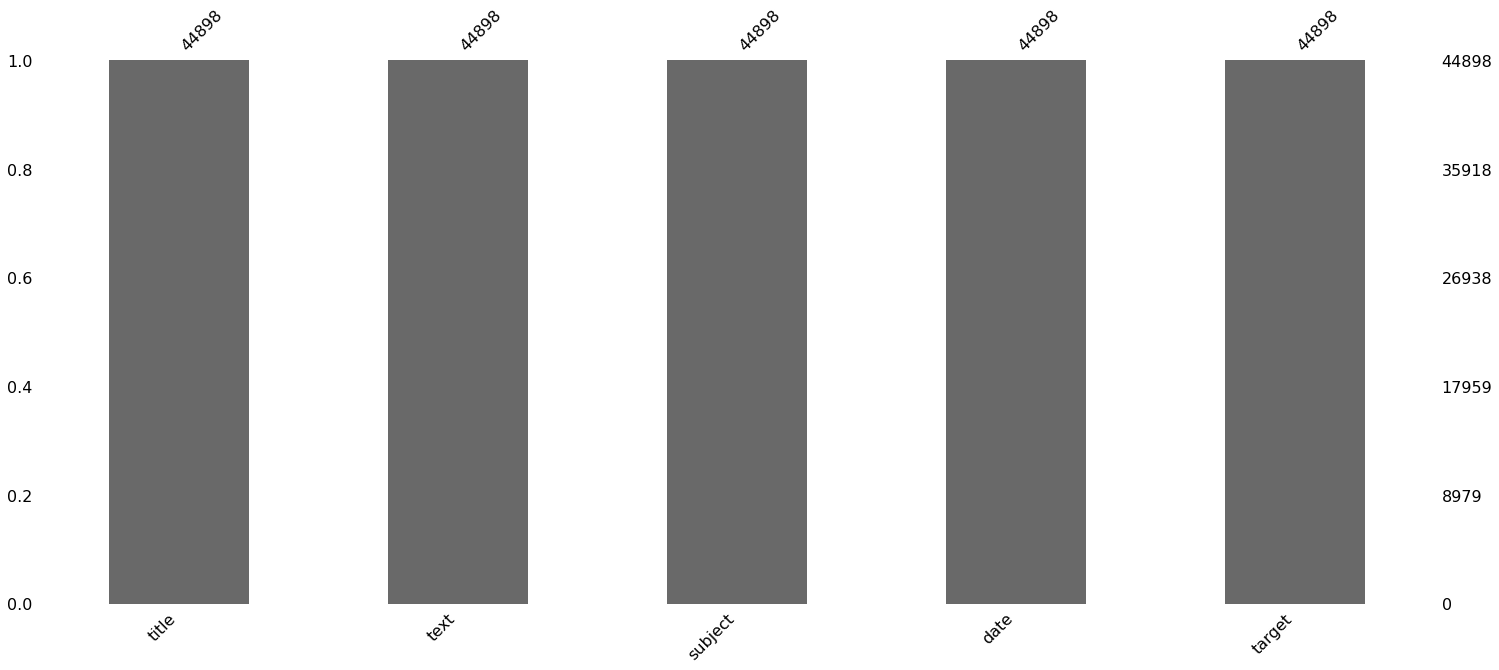

In [ ]:
msno.bar(data)

### there is no missing data 

### V. Generate a counterplot to show the number of news in each subject

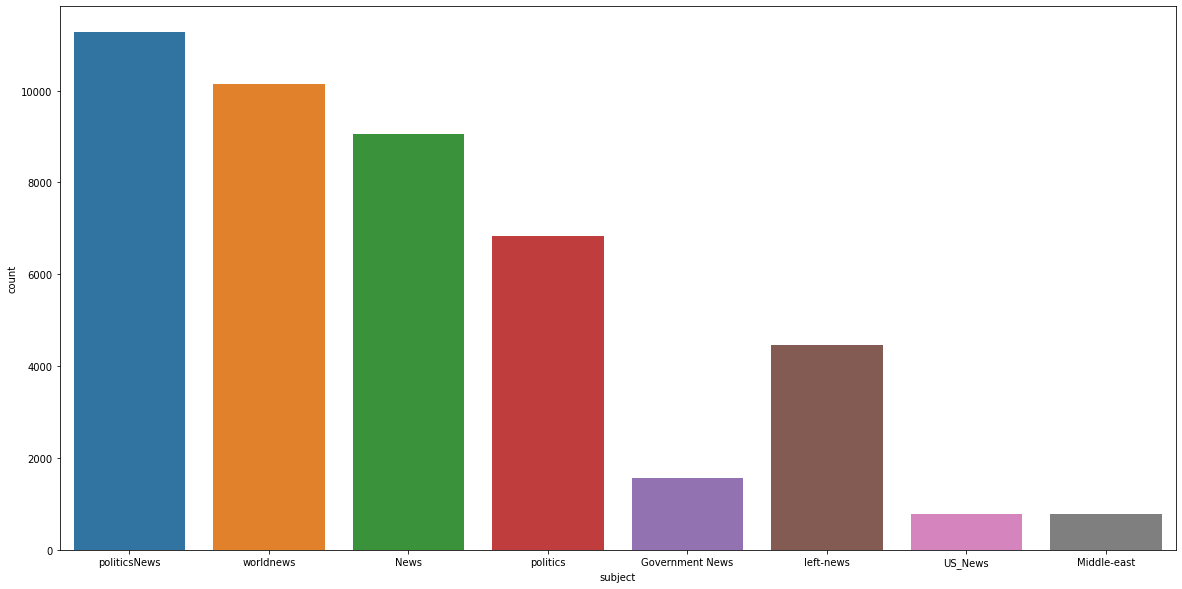

In [ ]:
plt.figure(figsize = (20,10))

sns.countplot(x="subject", data=data)


### VI. Generate a counterplot to show the number of news in each category (fake/ True)

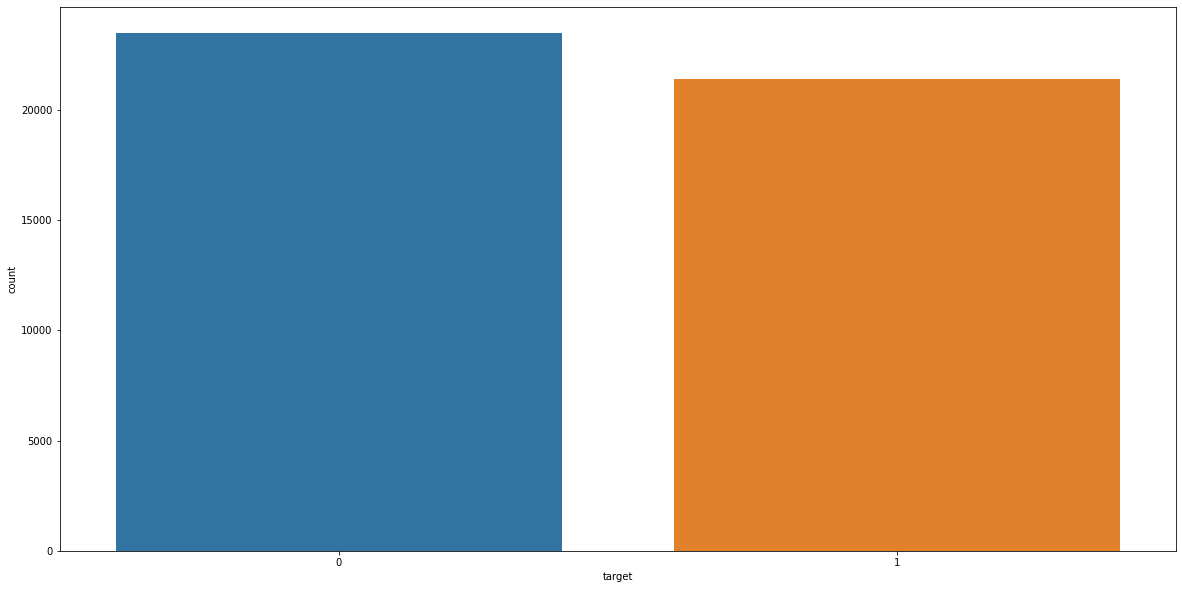

In [ ]:
plt.figure(figsize = (20,10))

sns.countplot(x="target", data=data)

### VII. Generate two word clouds, one for fake news and one for true news, and observe the most frequent words in each category and just write your observation on them.

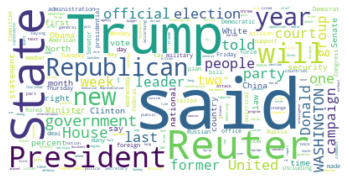

In [ ]:
true = data.loc[data['target']==1]
fake = data.loc[data['target']==0]


text1 = " ".join(cat for cat in true.text)

text2 = " ".join(cat2 for cat2 in fake.text)
    
    
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

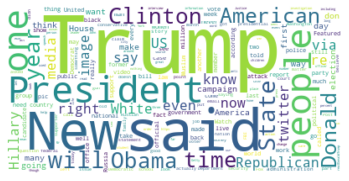

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text2)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### The fake group has the word Trump and President and New very prominantly.  Other words such as Obama and Clinton seem to be prevelant.  This actually matches the political climeate we were in with many unreal nws circulationg.  The true news also has promenant word such as Trump but Trump is not as prominant as fake  Other words are Said, Reuter and state.


### VIII. Create a column "AllText" that has the concatenated subject, title, and text [For example, for each news we have the subject, title, and text. We want a column that has all of this together as a large string]  [See the example answer with the majority vote in this link: https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra (Links to an external site.) )

In [ ]:
cols = ['title','text', 'subject']
data['AllText'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

### IX. Using the dataframe's copy function, save the data frame into another dataframe so that you can use it later

In [ ]:
dfCopy = data.copy()
dfCopy.head(10)

,title,text,subject,date,target,AllText
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1,"White House, Congress prepare for talks on spe..."
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1,"Trump says Russia probe will be fair, but time..."
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1,Factbox: Trump on Twitter (Dec 29) - Approval ...
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1,Trump on Twitter (Dec 28) - Global Warming_The...
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1,Alabama official to certify Senator-elect Jone...


### X. Drop the title, text, subject, and date columns from the data frame as we will not use them separately. We have all the text in a single column that you have generated above


In [ ]:
data = data.drop(columns=['title','text', 'subject', 'date'])
data.head(10)


,target,AllText
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
5,1,"White House, Congress prepare for talks on spe..."
6,1,"Trump says Russia probe will be fair, but time..."
7,1,Factbox: Trump on Twitter (Dec 29) - Approval ...
8,1,Trump on Twitter (Dec 28) - Global Warming_The...
9,1,Alabama official to certify Senator-elect Jone...


### XI. Calculate the length of each text (I mean AllText column) and put them in a length column

In [ ]:
data['length'] = data['AllText'].apply(len)
data.head()

,target,AllText,length
0,1,"As U.S. budget fight looms, Republicans flip t...",4737
1,1,U.S. military to accept transgender recruits o...,4155
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2863
3,1,FBI Russia probe helped by Australian diplomat...,2534
4,1,Trump wants Postal Service to charge 'much mor...,5287


### XII. Plot two histograms to see the distribution of the lengths. One for fake news and one for true news. Write in words about the plots.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff83d336f50>,
      dtype=object)

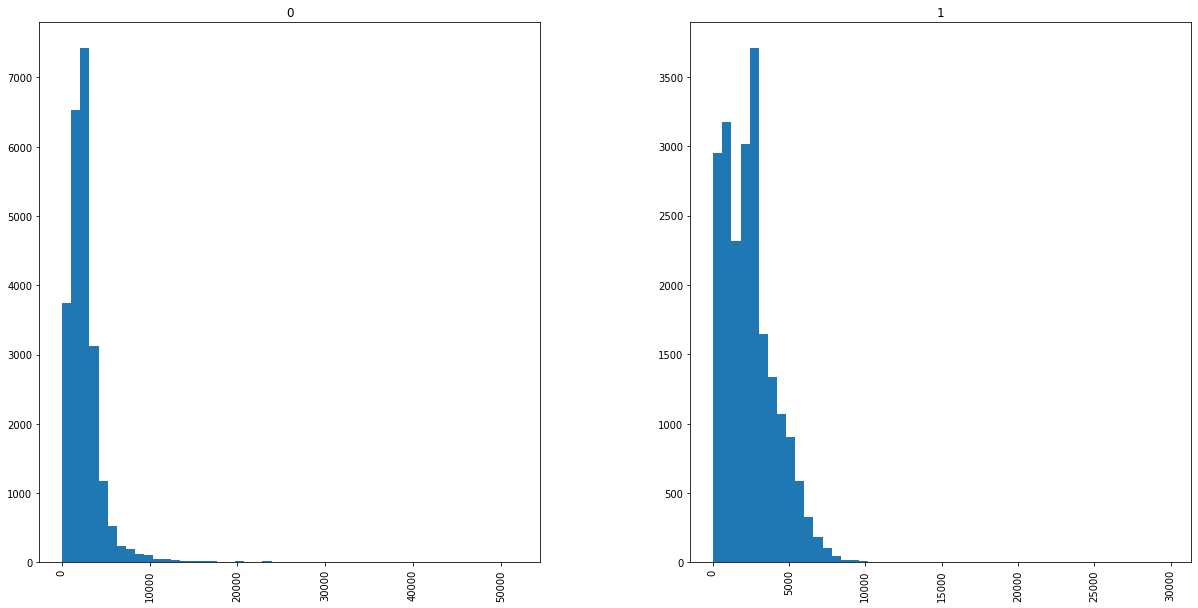

In [ ]:
data.hist(column='length', by='target', bins=50,figsize=(20,10))

#### Fake news has may lenghthy posts in the 7000 where as true news has many in shorter lenghts like 3500 so about half.  True news is more unifom to where there is a reasonable distribution between many word counts fro 500 to 3500 where as the fake news has a much narrower more concentrated hist.  Meaning most the data are within a set lenghth

### XIII. Write in Words: What is TFIDF? How to create bag of words using sklearn? And how to generate TFIDF for the bag of words?

#### Ter Frequency –Inverse Document Frequency (TFIDF).  This is a measurment that indicates how important a word is based on its useage on all docuemnts. With TFIDF frequent terms in the text are given higher weight and rewarded such as "the", "a", ... but their weight is also punished if they are frequent in one docuemnts and also the other documents.   In the same token it also rewads the words that are very rare and unique in the text and cannot be found as frequently in other test as an indicator that the text is highly related to the rare words as the word is uncomoon in other texts.  

#### applying the Scikit-learn’s CountVectorizer. First, we instantiate a CountVectorizer object and later we learn the term frequency of each word within the document. In the end, we return the document-term matrix.  CountVectorizer provides the get_features_name method, which contains the uniques words of the vocabulary, taken into account later to create the desired document-term matrix X.  If we want to  to remove the stop words wwe only need to add stop_words='english argument in the CountVectorizer functio

## 2. Train Test Split

### I. Import related libraries and perform train test split. Keep 20% data in the test set

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['target'])
msg_train, msg_test, label_train, label_test =  train_test_split(data['AllText'], data['target'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))



X = data.drop(columns=['target'])
y = data.drop(columns=['AllText', 'length'])

X_tarin, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

print(len(X_tarin), len(X_test), len(y_train) , len(y_test))



35918 8980 44898
35918 8980 35918 8980


In [ ]:
label_train.head(10)

13777    1
10297    1
20776    1
44078    0
13875    1
27966    0
43977    0
14473    1
4756     1
15135    1
Name: target, dtype: int64

### II. Using a count plot show how many real and fake news do we have in the training set and how many in the test set


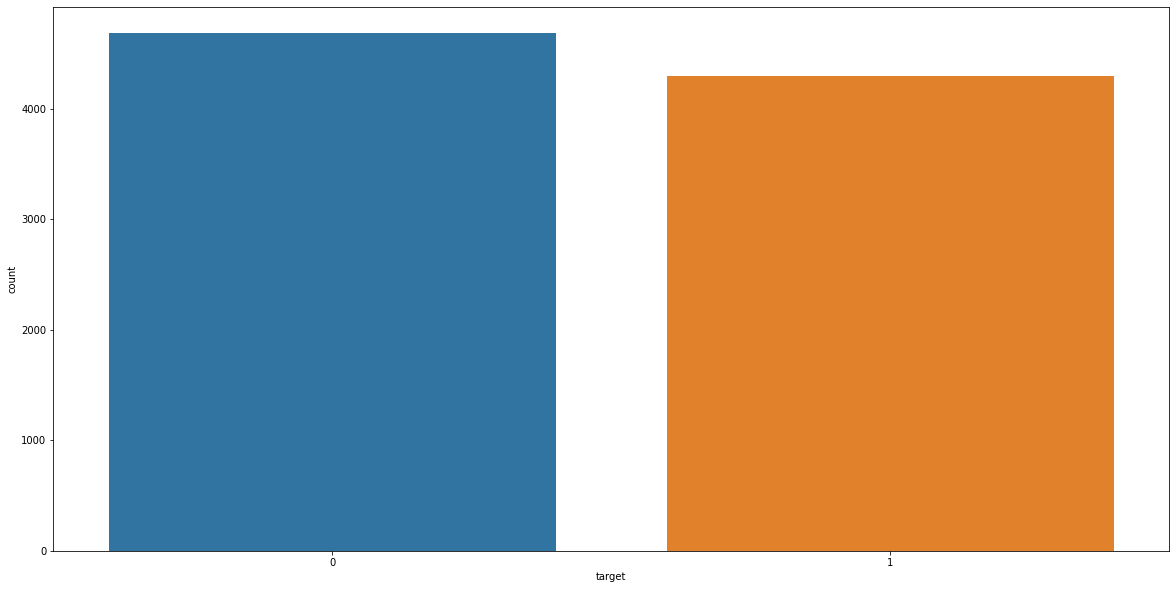

In [ ]:
plt.figure(figsize = (20,10))

sns.countplot(x='target', data=y_test)

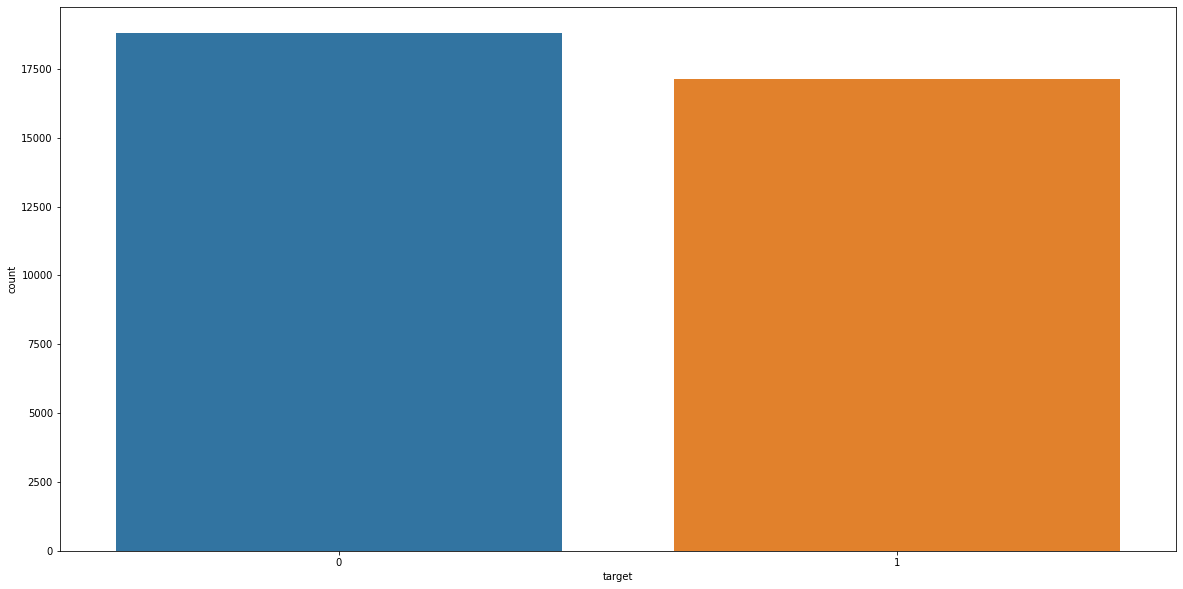

In [ ]:
plt.figure(figsize = (20,10))

sns.countplot(x="target", data=y_train)

## 3. Training and Testing Fake news classifier using MultinomialNB
 

### I. Create a pipeline that will use countVectorizer with the function you have created earlier for data preprocessing, then use Tftransformer and then use the NaiveBayes classifier

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
import string

stemmer = LancasterStemmer()

def process(text):

    stopwordList = stopwords.words('english')

    # Check characters to see if they are in punctuation
    text1 = [char for char in text if char not in string.punctuation]
     # Join the characters again to form the string.
    text1 = ''.join(text)

    words = nltk.word_tokenize(text1)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

In [ ]:
data['AllText'].head(5).apply(process)

0    [as, u.s., budget, fight, loom, ,, republ, fli...
1    [u.s., milit, acceiv, transgend, recruit, mond...
2    [seny, u.s., republ, sen, :, 'let, mr., muel, ...
3    [fbi, russ, prob, help, aust, diplom, tip-off,...
4    [trump, want, post, serv, charg, 'much, ', ama...
Name: AllText, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
transformer = CountVectorizer(analyzer=process).fit(data['AllText']) 
print(len(transformer.vocabulary_))

218937


In [ ]:
data2 = transformer.transform(data['AllText'])
data2

<44898x218937 sparse matrix of type '<class 'numpy.int64'>'
	with 7723879 stored elements in Compressed Sparse Row format>

In [ ]:
message3 = data['AllText'][2]
print(message3)

Senior U.S. Republican senator: 'Let Mr. Mueller do his job'_WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed

In [ ]:
bow3 = transformer.transform([message3])
print(bow3)
print(bow3.shape)

  (0, 741)	1
  (0, 1492)	2
  (0, 1493)	2
  (0, 1826)	19
  (0, 1840)	1
  (0, 2236)	17
  (0, 12143)	1
  (0, 14573)	1
  (0, 22057)	1
  (0, 23179)	1
  (0, 25004)	1
  (0, 25980)	2
  (0, 26243)	1
  (0, 28189)	4
  (0, 31241)	1
  (0, 34006)	1
  (0, 34486)	1
  (0, 36006)	1
  (0, 40942)	1
  (0, 43869)	1
  (0, 45029)	1
  (0, 46103)	1
  (0, 46557)	1
  (0, 47181)	1
  (0, 47618)	6
  :	:
  (0, 194680)	1
  (0, 195366)	1
  (0, 196004)	2
  (0, 196046)	1
  (0, 196548)	1
  (0, 197679)	2
  (0, 199187)	1
  (0, 199626)	14
  (0, 202418)	2
  (0, 203619)	1
  (0, 205283)	4
  (0, 209692)	3
  (0, 210258)	1
  (0, 210677)	2
  (0, 211354)	2
  (0, 211749)	1
  (0, 212676)	1
  (0, 212901)	1
  (0, 214004)	3
  (0, 215315)	1
  (0, 216502)	1
  (0, 217316)	2
  (0, 218716)	8
  (0, 218717)	5
  (0, 218718)	5
(1, 218937)


In [ ]:
print(transformer.get_feature_names_out()[16])


'1484931600000


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
tfidf_transformer = TfidfTransformer().fit(data2)
data_tfidf = tfidf_transformer.transform(data2)
print(data_tfidf.shape) 

(44898, 218937)


In [ ]:
data_tfidf

<44898x218937 sparse matrix of type '<class 'numpy.float64'>'
	with 7723879 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(data_tfidf, data['target'])

all_predictions = model.predict(data_tfidf)
print(all_predictions)

[1 1 1 ... 1 0 0]


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### II. Fit the pipeline and then perform prediction

In [ ]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x7ff83d306680>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(msg_test)  

### III. Generate classification report and confusion matrix (you have to achieve at least 96% accuracy for the test set to receive full credit)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(label_test, predictions))  


[[4565  167]
 [ 170 4078]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(label_test, predictions).ravel()
tn, fp, fn, tp



(4565, 167, 170, 4078)

In [ ]:
print(classification_report(label_test, predictions))   

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4732
           1       0.96      0.96      0.96      4248

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



### IV. Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.

#### model is performing at over 96% accuracy.  Looking at precision and recall and f1 score all all are 97% for fale new and 96% for true news.  number of false negatives and false positives are 157 and 163 only which among 8900+ data is neglagible.


### V. Copy a part of any news of your choice from a news website and then use the model to predict whether is it true or not. 

In [ ]:
newSMS = "A series of May primaries represent the biggest test yet of Donald Trump’s post-presidential influence on the Republican electorate, with the outcomes carrying implications for his potential third White House campaign and control of Congress.The fate of several of Mr. Trump’s highest-profile endorsements will be determined during a month that features a dozen primaries from coast to coast. GOP contests for U.S. Senate in Ohio on Tuesday and the battleground states of Georgia, North Carolina, Ohio and Pennsylvania in the following weeks will be among the most closely watched, as well as a Republican primary for governor in Georgia, where Mr. Trump badly wants incumbent Brian Kemp defeated.In the 15 months since leaving office, the former president has endorsed 150 candidates for offices ranging from state legislatures to the Senate, according to the election data website Ballotpedia.The large number—a level of involvement in party politics not seen from a former president for at least a century—is part of an effort to remain relevant for a possible second run against President Biden in 2024, something Mr. Trump has strongly hinted he will do. He has often awarded his support to those who display loyalty to him, including agreeing with his false claims of widespread election fraud in the 2020 presidential election.“Up until now, everything about Trump has been speculation, with a little bit of polling data,” said Scott Reed, a Republican and former chief political strategist for the U.S. Chamber of Commerce. “But by the end of May, we will have hard data on him from these primaries.”Mr. Reed said he will especially be watching the Senate primaries in Ohio and Pennsylvania. “Those are the two that will be the barometer for telling Trump’s strength with the GOP electorate,” he said.Mr. Trump’s deep involvement in GOP primaries has left some establishment Republicans like Mr. Reed worried that some of his selections—if they are successful in their primaries—could prove to be flawed in the general election, when candidates must win over independent voters and the former president’s seal of approval could prove to be harmful.Polling suggests an endorsement from Mr. Trump can be somewhat helpful among GOP voters. A Quinnipiac University survey released Wednesday showed 45% of Republicans say they are more likely to vote for a Trump-endorsed candidate, while 8% say they are less likely and 44% say it doesn’t make a difference."

pipeline.predict([newSMS])

array([0])

## 4. Training and Testing a Deep Neural Network

### I. Import related library for using MLPClassifier from sklearn neural netowrk.

In [ ]:
from sklearn.neural_network import MLPClassifier


### II. Create a pipeline like 3i, for MLPClassfier you should use at least two layers and also should verbose = 2 (you can use other parameters as you wish or use the one you see from the uploaded google colab)


In [ ]:

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

### III.Fit the pipeline and then perform prediction

In [ ]:
pipeline.fit(msg_train,label_train)

Iteration 1, loss = 0.21525913
Validation score: 0.996102
Iteration 2, loss = 0.01440476
Validation score: 0.998051
Iteration 3, loss = 0.00454155
Validation score: 0.998051
Iteration 4, loss = 0.00255710
Validation score: 0.998051
Iteration 5, loss = 0.00179341
Validation score: 0.998330
Iteration 6, loss = 0.00143666
Validation score: 0.998051
Iteration 7, loss = 0.00122544
Validation score: 0.998051
Iteration 8, loss = 0.00108099
Validation score: 0.998051
Iteration 9, loss = 0.00097478
Validation score: 0.998051
Iteration 10, loss = 0.00089147
Validation score: 0.998051
Iteration 11, loss = 0.00082255
Validation score: 0.998051
Iteration 12, loss = 0.00076436
Validation score: 0.998051
Iteration 13, loss = 0.00071389
Validation score: 0.998051
Iteration 14, loss = 0.00066906
Validation score: 0.998051
Iteration 15, loss = 0.00062895
Validation score: 0.998051
Iteration 16, loss = 0.00059214
Validation score: 0.998051
Validation score did not improve more than tol=0.000100 for 10 co

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x7ff83d306680>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               random_state=0, verbose=2))])

In [ ]:
predictions = pipeline.predict(msg_test)  

### IV. Generate classification report and confusion matrix (You have to achieve at least 99% accuracy to receive full credit for this model)


In [ ]:
print(confusion_matrix(label_test, predictions))

[[4718   14]
 [   5 4243]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(label_test, predictions).ravel()
tn, fp, fn, tp

(4718, 14, 5, 4243)

In [ ]:
print(classification_report(label_test, predictions))   



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4732
           1       1.00      1.00      1.00      4248

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### V. Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.

#### model is performing at over 99% accuracy.  Looking at precision and recall and f1 score all all are 99% number of false negatives and false positives are minimalwhich among 8900+ data is neglagible.


### VI. Use the same news you have used above and then use the model to predict whether is it true or not. 

In [ ]:
newSMS = "A series of May primaries represent the biggest test yet of Donald Trump’s post-presidential influence on the Republican electorate, with the outcomes carrying implications for his potential third White House campaign and control of Congress.The fate of several of Mr. Trump’s highest-profile endorsements will be determined during a month that features a dozen primaries from coast to coast. GOP contests for U.S. Senate in Ohio on Tuesday and the battleground states of Georgia, North Carolina, Ohio and Pennsylvania in the following weeks will be among the most closely watched, as well as a Republican primary for governor in Georgia, where Mr. Trump badly wants incumbent Brian Kemp defeated.In the 15 months since leaving office, the former president has endorsed 150 candidates for offices ranging from state legislatures to the Senate, according to the election data website Ballotpedia.The large number—a level of involvement in party politics not seen from a former president for at least a century—is part of an effort to remain relevant for a possible second run against President Biden in 2024, something Mr. Trump has strongly hinted he will do. He has often awarded his support to those who display loyalty to him, including agreeing with his false claims of widespread election fraud in the 2020 presidential election.“Up until now, everything about Trump has been speculation, with a little bit of polling data,” said Scott Reed, a Republican and former chief political strategist for the U.S. Chamber of Commerce. “But by the end of May, we will have hard data on him from these primaries.”Mr. Reed said he will especially be watching the Senate primaries in Ohio and Pennsylvania. “Those are the two that will be the barometer for telling Trump’s strength with the GOP electorate,” he said.Mr. Trump’s deep involvement in GOP primaries has left some establishment Republicans like Mr. Reed worried that some of his selections—if they are successful in their primaries—could prove to be flawed in the general election, when candidates must win over independent voters and the former president’s seal of approval could prove to be harmful.Polling suggests an endorsement from Mr. Trump can be somewhat helpful among GOP voters. A Quinnipiac University survey released Wednesday showed 45% of Republicans say they are more likely to vote for a Trump-endorsed candidate, while 8% say they are less likely and 44% say it doesn’t make a difference."

pipeline.predict([newSMS])

array([1])

### VII. Discuss any difference in performance between this model and NB model 

#### there is difference between the two model the deep neural model provides better accuracy becuase its capabale of capturing more details and hence predicting better.  It took longer to run the model which is due to more computeationally extensice of the model with deep learning


## 5. Extra Credit: 15 pts

### I. Build a high-performance model for classifying the news into different subjects. It means your target column will be the subject column. During this process, you have to use a neural network, properly preprocess the data frame, remove irrelevant columns, train and test the model properly and then finally show the classification report and confusion matrix. In order to get full credit, it should be at least 79% accurate in predicting the subject of news. Finally, you should discuss the classification report like what are the weaknesses of the model and what are the strengths of the model. 
 

In [ ]:
cols = ['title','text']
dfCopy['AllText'] = dfCopy[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [ ]:
dfCopy.head(5)

,title,text,subject,date,target,AllText
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


In [ ]:
dfCopy = dfCopy.drop(columns=['title','text', 'date', 'target'])
dfCopy.head(10)

,subject,AllText
0,politicsNews,"As U.S. budget fight looms, Republicans flip t..."
1,politicsNews,U.S. military to accept transgender recruits o...
2,politicsNews,Senior U.S. Republican senator: 'Let Mr. Muell...
3,politicsNews,FBI Russia probe helped by Australian diplomat...
4,politicsNews,Trump wants Postal Service to charge 'much mor...
5,politicsNews,"White House, Congress prepare for talks on spe..."
6,politicsNews,"Trump says Russia probe will be fair, but time..."
7,politicsNews,Factbox: Trump on Twitter (Dec 29) - Approval ...
8,politicsNews,Trump on Twitter (Dec 28) - Global Warming_The...
9,politicsNews,Alabama official to certify Senator-elect Jone...


In [ ]:
dfCopy['length'] = dfCopy['AllText'].apply(len)
dfCopy.head()



,subject,AllText,length
0,politicsNews,"As U.S. budget fight looms, Republicans flip t...",4724
1,politicsNews,U.S. military to accept transgender recruits o...,4142
2,politicsNews,Senior U.S. Republican senator: 'Let Mr. Muell...,2850
3,politicsNews,FBI Russia probe helped by Australian diplomat...,2521
4,politicsNews,Trump wants Postal Service to charge 'much mor...,5274


In [ ]:
X = data.drop(columns=['target'])
msg_train, msg_test, label_train, label_test =  train_test_split(dfCopy['AllText'], dfCopy['subject'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))


35918 8980 44898


In [ ]:
label_train.head(10)

5095     politicsNews
29748            News
374      politicsNews
26652            News
31080        politics
5282     politicsNews
6865     politicsNews
3556     politicsNews
1530     politicsNews
6264     politicsNews
Name: subject, dtype: object

In [ ]:
transformer = CountVectorizer(analyzer=process).fit(dfCopy['AllText']) 
print(len(transformer.vocabulary_))


216290


In [ ]:
data2 = transformer.transform(dfCopy['AllText'])
data2

<44898x216290 sparse matrix of type '<class 'numpy.int64'>'
	with 7688526 stored elements in Compressed Sparse Row format>

In [ ]:
message3 = dfCopy['AllText'][2]
print(message3)

Senior U.S. Republican senator: 'Let Mr. Mueller do his job'_WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed

In [ ]:
bow3 = transformer.transform([message3])
print(bow3)
print(bow3.shape)

  (0, 741)	1
  (0, 1492)	2
  (0, 1493)	2
  (0, 1824)	19
  (0, 1838)	1
  (0, 2233)	17
  (0, 12050)	1
  (0, 14467)	1
  (0, 21923)	1
  (0, 24846)	1
  (0, 25808)	2
  (0, 26067)	1
  (0, 27987)	4
  (0, 31002)	1
  (0, 33743)	1
  (0, 34216)	1
  (0, 35721)	1
  (0, 40611)	1
  (0, 43511)	1
  (0, 44651)	1
  (0, 45720)	1
  (0, 46166)	1
  (0, 46775)	1
  (0, 47199)	6
  (0, 48679)	1
  :	:
  (0, 192440)	1
  (0, 193119)	1
  (0, 193751)	2
  (0, 193793)	1
  (0, 194288)	1
  (0, 195403)	2
  (0, 196882)	1
  (0, 197316)	14
  (0, 200081)	2
  (0, 201270)	1
  (0, 202914)	4
  (0, 207239)	3
  (0, 207794)	1
  (0, 208197)	2
  (0, 208856)	2
  (0, 209246)	1
  (0, 210151)	1
  (0, 210373)	1
  (0, 211450)	3
  (0, 212734)	1
  (0, 213876)	1
  (0, 214684)	2
  (0, 216069)	8
  (0, 216070)	5
  (0, 216071)	5
(1, 216290)


In [ ]:
print(transformer.get_feature_names_out()[16])

'1484931600000


In [ ]:
tfidf_transformer = TfidfTransformer().fit(data2)
data_tfidf = tfidf_transformer.transform(data2)
print(data_tfidf.shape) 

(44898, 216290)


In [ ]:
data_tfidf

<44898x216290 sparse matrix of type '<class 'numpy.float64'>'
	with 7688526 stored elements in Compressed Sparse Row format>

In [ ]:
model = MultinomialNB().fit(data_tfidf, dfCopy['subject'])

all_predictions = model.predict(data_tfidf)
print(all_predictions)

['politicsNews' 'politicsNews' 'politicsNews' ... 'worldnews' 'News'
 'politicsNews']


In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

In [ ]:
pipeline.fit(msg_train,label_train)

Iteration 1, loss = 1.77330057
Validation score: 0.573497
Iteration 2, loss = 1.16074965
Validation score: 0.599109
Iteration 3, loss = 1.00876019
Validation score: 0.603842
Iteration 4, loss = 0.93389725
Validation score: 0.603842
Iteration 5, loss = 0.87779349
Validation score: 0.605234
Iteration 6, loss = 0.82895679
Validation score: 0.618597
Iteration 7, loss = 0.78659546
Validation score: 0.621381
Iteration 8, loss = 0.75762663
Validation score: 0.621381
Iteration 9, loss = 0.73690238
Validation score: 0.677060
Iteration 10, loss = 0.71988464
Validation score: 0.676225
Iteration 11, loss = 0.70697956
Validation score: 0.678452
Iteration 12, loss = 0.69542602
Validation score: 0.678731
Iteration 13, loss = 0.68608596
Validation score: 0.685969
Iteration 14, loss = 0.67740526
Validation score: 0.685134
Iteration 15, loss = 0.66833125
Validation score: 0.697383
Iteration 16, loss = 0.64324424
Validation score: 0.778118
Iteration 17, loss = 0.55969787
Validation score: 0.806514
Iterat

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x7ff83d306680>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               random_state=0, verbose=2))])

In [ ]:
predictions = pipeline.predict(msg_test)  

In [ ]:
print(confusion_matrix(label_test, predictions))  

[[   0    0    9    7    0  281    1    7]
 [   0    2    1  129    0   11    0    2]
 [   0    0 1687    0    2   99    7    5]
 [   0    4    0  133    0    7    0    3]
 [   0    0   48    6    0  863    1   15]
 [   0    0   66   16    2 1261    8   22]
 [   0    0    0    0    0    0 2202   49]
 [   0    0    1    0    0    0   44 1979]]


In [ ]:
print(classification_report(label_test, predictions))   

                 precision    recall  f1-score   support

Government News       0.00      0.00      0.00       305
    Middle-east       0.33      0.01      0.03       145
           News       0.93      0.94      0.93      1800
        US_News       0.46      0.90      0.61       147
      left-news       0.00      0.00      0.00       933
       politics       0.50      0.92      0.65      1375
   politicsNews       0.97      0.98      0.98      2251
      worldnews       0.95      0.98      0.96      2024

       accuracy                           0.81      8980
      macro avg       0.52      0.59      0.52      8980
   weighted avg       0.73      0.81      0.76      8980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
